## Create TVB regionMapping

To project simulated neural data to sensor-space using TVB, a region mapping is needed to map nodes from a cortical parcellation to vertices of a cortical surface. This Notebook creates such a region mapping for the Desikan-Kiliany parcellation ("regionMapping_16k_66.txt")

In [1]:
%matplotlib nbagg
import numpy as np
import itertools
import matplotlib.pyplot as plt
from scipy.stats import zscore
from mpl_toolkits import mplot3d
import matplotlib.cm as cm
import matplotlib.colors as colors

In [2]:
## Import positions of vertices from cortical surface
f1 = open("/anaconda3/lib/python3.7/site-packages/tvb_data/surfaceData/vertices.txt", 'r')
vert_pos = np.reshape( f1.read().split() , (16384,3) ) . astype('float')
f1.close()

## Import positions of nodes from cortical parcellation
f2 = open("/anaconda3/lib/python3.7/site-packages/tvb_data/connectivity/connectivity_66/centres.txt", 'r')
node_pos_tmp = np.array( f2.read().splitlines() )
f2.close()
node_pos = np.array( [ line.split()[1:4] for line in node_pos_tmp ] ) . astype('float')

<IPython.core.display.Javascript object>


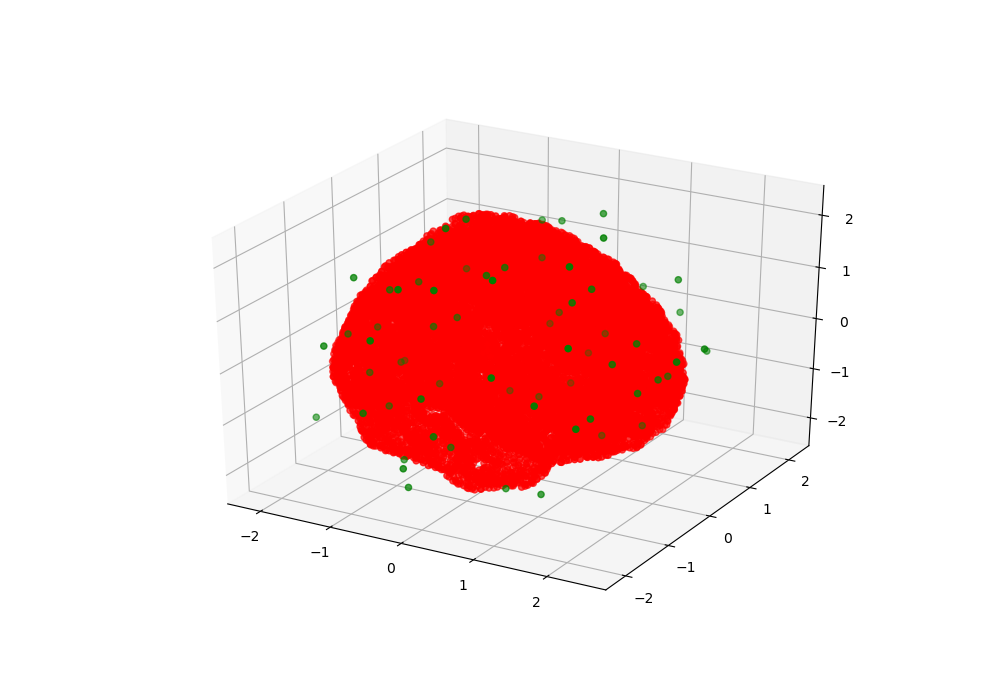

In [3]:
## Align vertex and node positions by normalisation (zscore) and scaling (sc_fac)

sc_fac = 1.25  ## trial-and-error

## Scatter plot of vertex and node positions
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D( sc_fac*zscore(node_pos[:,0]) , sc_fac*zscore(node_pos[:,1]) , sc_fac*zscore(node_pos[:,2]), color = "green"); 
ax.scatter3D( zscore(vert_pos[:,0]) , zscore(vert_pos[:,1]) , zscore(vert_pos[:,2]), color = "red");
plt.show()

In [4]:
## Save aligned positions

node_pos_sc = np.vstack(( sc_fac*zscore(node_pos[:,0]) , sc_fac*zscore(node_pos[:,1]) , sc_fac*zscore(node_pos[:,2]) )).T
vert_pos_sc = np.vstack(( zscore(vert_pos[:,0]) , zscore(vert_pos[:,1]) , zscore(vert_pos[:,2]) )).T

<IPython.core.display.Javascript object>


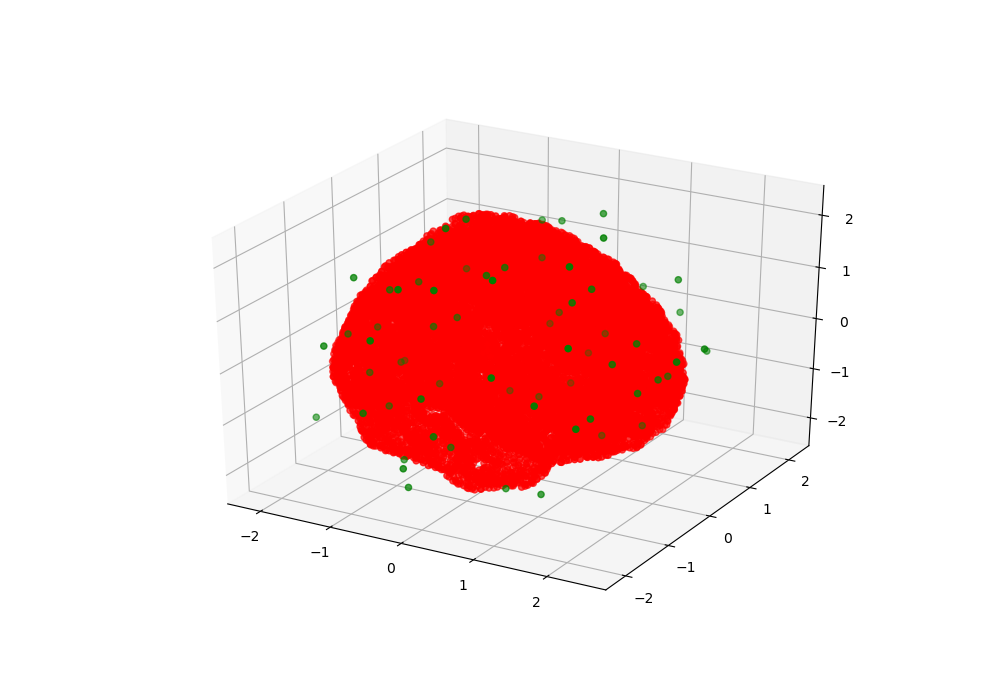

In [5]:
## Confirm that alignment is adequate

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D( node_pos_sc[:,0] , node_pos_sc[:,1] , node_pos_sc[:,2], color = "green"); 
ax.scatter3D( vert_pos_sc[:,0] , vert_pos_sc[:,1] , vert_pos_sc[:,2], color = "red");
plt.show()

<IPython.core.display.Javascript object>


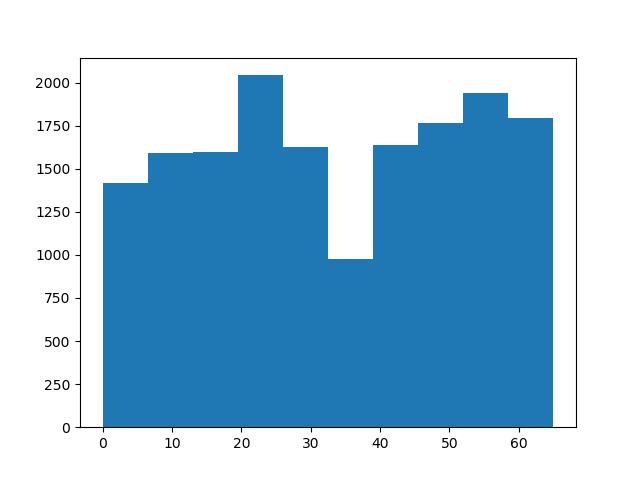

In [7]:
## For each vertex, find closest node using Euclidean distance

regionMapping = []
for verti in np.arange(len(vert_pos_sc)):
    dist = []
    for nodei in np.arange(len(node_pos_sc)):
        dist.append( np.sum( (vert_pos_sc[verti,:] - node_pos_sc[nodei,:]) ** 2 ))
        
    regionMapping . append( dist.index( np.min(dist) ) )
    
## Histogram of nodes corresponding to closest node to individual vertices
plt.figure()
plt.hist(regionMapping)
plt.show()

<IPython.core.display.Javascript object>


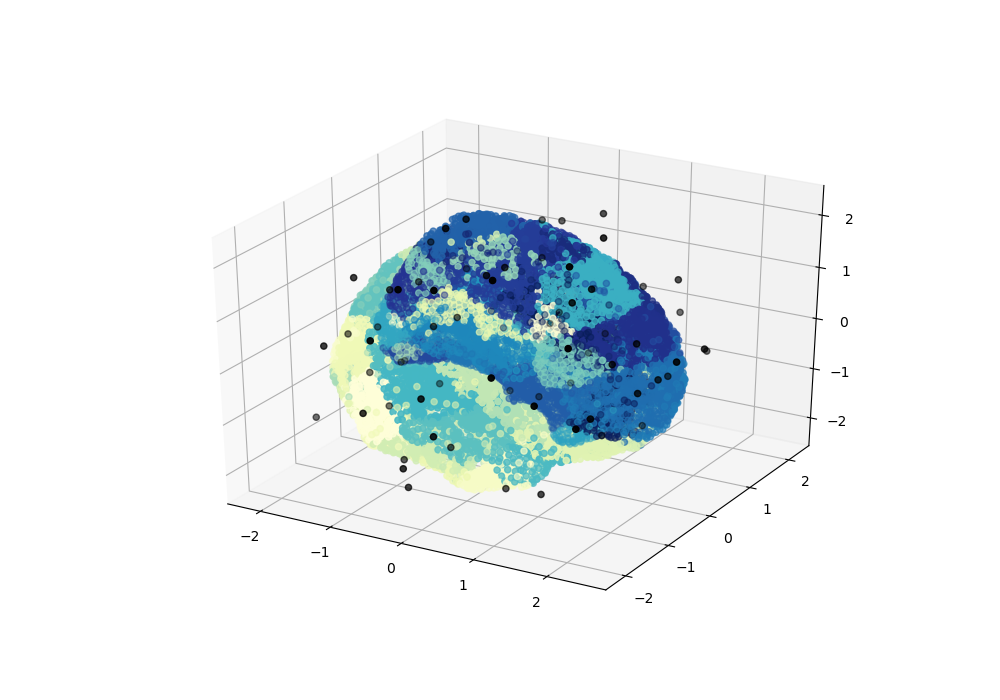

In [8]:
## Color map of matching between vertices and associated closest node

## Creating colormap to map vertices to node
norm = colors.Normalize(vmin=0, vmax=65)
f2rgb = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('YlGnBu'))
rgb = f2rgb.to_rgba(regionMapping)

## 3D Scatter plot
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D( vert_pos_sc[:,0] , vert_pos_sc[:,1] , vert_pos_sc[:,2], color = rgb);
ax.scatter3D( node_pos_sc[:,0] , node_pos_sc[:,1] , node_pos_sc[:,2], color = "black");
plt.show()

In [10]:
## Reformat region mapping and save to file: "regionMapping_16k_66.txt"

regionMapping_str = str(list(regionMapping)).strip("[").strip("]").replace(',','')

with open("/anaconda3/lib/python3.7/site-packages/tvb_data/regionMapping/regionMapping_16k_66.txt", 'w') as f:
    f.write("%s" % regionMapping_str)